In [178]:
import pandas as pd
import numpy as np
pd.options.display.float_format = '{:.5f}'.format

import matplotlib.pyplot as plt
from matplotlib import rc
%matplotlib inline
import seaborn as sns
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

In [179]:
df = pd.read_csv('./dataset/total.csv', encoding='cp949', low_memory=False)
df

,회사명,거래소코드,회계년도,자산(*)(천원),부채(*)(천원),자본(*)(천원),유동자산(*)(천원),유동부채(*)(천원),당좌자산(*)(천원),단기차입금(*)(천원),...,무형자산(*)(천원),이연자산(*)(천원),매출채권(*)(천원),재고자산(*)(천원),법인세비용차감전(계속사업)손익(천원),세금과공과(천원),퇴직급여(천원),임차료(천원),영업외수익(*)(천원),영업외비용(*)(천원)
0,(주)A.M.C,64118,Dec-11,13250271.00000,6734376.00000,6515895.00000,8115329.00000,5523764.00000,7662911.00000,3298096.00000,...,1303.00000,0.00000,4022660.00000,452418.00000,2904489.00000,1094.00000,66651.00000,13040.00000,1011573.00000,641567.00000
1,(주)A.M.C,64118,Dec-12,16129899.00000,7028671.00000,9101228.00000,10202990.00000,5442761.00000,9696157.00000,2298500.00000,...,843.00000,0.00000,3977666.00000,506833.00000,3326682.00000,6494.00000,129080.00000,10600.00000,680679.00000,552552.00000
2,(주)A.M.C,64118,Dec-13,17709388.00000,5815688.00000,11893700.00000,9018587.00000,3010189.00000,8627090.00000,1550000.00000,...,383.00000,0.00000,3957316.00000,391497.00000,3299456.00000,5018.00000,132109.00000,36840.00000,845736.00000,1038021.00000
3,(주)A.M.C,64118,Dec-14,21742688.00000,11670728.00000,10071961.00000,6834570.00000,4434169.00000,6290840.00000,3525000.00000,...,1.00000,0.00000,2510165.00000,543730.00000,-1571167.00000,7093.00000,36515.00000,50410.00000,424952.00000,2085473.00000
4,(주)A.M.C,64118,Dec-15,20428850.00000,12019913.00000,8408937.00000,5563581.00000,4572707.00000,3875390.00000,3405000.00000,...,1.00000,0.00000,2940143.00000,1688191.00000,-1918918.00000,23948.00000,192068.00000,7493.00000,351075.00000,1381270.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289065,힐링홈스주식회사,84799,Dec-17,10169205.00000,8930628.00000,1238577.00000,9885908.00000,5437722.00000,2424901.00000,0.00000,...,0.00000,0.00000,810194.00000,7461007.00000,619765.00000,8835.00000,0.00000,22716.00000,15626.00000,234379.00000
289066,힐코리아주식회사,43486,Dec-05,5337737.00000,7058765.00000,-1721028.00000,1171463.00000,6542860.00000,1171463.00000,3907109.00000,...,0.00000,0.00000,25432.00000,0.00000,-1327720.00000,77466.00000,32140.00000,29979.00000,3609.00000,985112.00000
289067,힐코리아주식회사,43486,Dec-08,13104301.00000,14025129.00000,-920828.00000,1815228.00000,10518265.00000,1815228.00000,62370.00000,...,0.00000,0.00000,0.00000,0.00000,-48307.00000,5899.00000,1177.00000,24615.00000,83240.00000,6631.00000
289068,힐코리아주식회사,43486,Dec-09,10086534.00000,12387575.00000,-2301041.00000,1721273.00000,10690254.00000,1721273.00000,317020.00000,...,0.00000,0.00000,0.00000,0.00000,-1335713.00000,1770.00000,26589.00000,13013.00000,82787.00000,1205481.00000


In [180]:
interest = pd.read_csv('./dataset/이자비용.csv', encoding='cp949')
interest

,회사명,거래소코드,회계년도,이자비용
0,(유)그룹세브코리아,13171,Dec-01,47143.00000
1,(유)그룹세브코리아,13171,Dec-02,0.00000
2,(유)그룹세브코리아,13171,Dec-03,153726.00000
3,(유)그룹세브코리아,13171,Dec-04,102219.00000
4,(유)짐머바이오메트코리아,18711,Dec-01,399081.00000
...,...,...,...,...
298900,희훈아티퍼니처주식회사,20565,Dec-02,914876.00000
298901,희훈아티퍼니처주식회사,20565,Dec-03,1112118.00000
298902,희훈아티퍼니처주식회사,20565,Dec-04,1178166.00000
298903,희훈아티퍼니처주식회사,20565,Dec-05,710472.00000


In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289070 entries, 0 to 289069
Data columns (total 35 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   회사명                    289070 non-null  object 
 1   거래소코드                  289070 non-null  int64  
 2   회계년도                   289070 non-null  object 
 3   자산(*)(천원)              288928 non-null  float64
 4   부채(*)(천원)              288928 non-null  float64
 5   자본(*)(천원)              288928 non-null  float64
 6   유동자산(*)(천원)            288928 non-null  float64
 7   유동부채(*)(천원)            288928 non-null  float64
 8   당좌자산(*)(천원)            288928 non-null  float64
 9   단기차입금(*)(천원)           288928 non-null  float64
 10  장기차입금(*)(천원)           288928 non-null  float64
 11  사채(*)(천원)              288928 non-null  float64
 12  매출액(영업수익)(*)(천원)       288928 non-null  float64
 13  당기순이익(순손실)(천원)         288928 non-null  float64
 14  감가상각비(천원)              288928 non-nu

#### 컬럼명 정리

In [182]:
df.columns

Index(['회사명', '거래소코드', '회계년도', '자산(*)(천원)', '부채(*)(천원)', '자본(*)(천원)',
       '유동자산(*)(천원)', '유동부채(*)(천원)', '당좌자산(*)(천원)', '단기차입금(*)(천원)',
       '장기차입금(*)(천원)', '사채(*)(천원)', '매출액(영업수익)(*)(천원)', '당기순이익(순손실)(천원)',
       '감가상각비(천원)', '기타대손상각비(천원)', '이자비용(천원)', '이자수익(천원)', '유동성장기부채(*)(천원)',
       '영업활동으로 인한 현금흐름(*)(천원)', '당기순이익(순손실)(천원).1', '영업이익(손실)(천원)',
       '매출원가(*)(천원)', '투자자산(*)(천원)', '유형자산(*)(천원)', '무형자산(*)(천원)',
       '이연자산(*)(천원)', '매출채권(*)(천원)', '재고자산(*)(천원)', '법인세비용차감전(계속사업)손익(천원)',
       '세금과공과(천원)', '퇴직급여(천원)', '임차료(천원)', '영업외수익(*)(천원)', '영업외비용(*)(천원)'],
      dtype='object')

In [183]:
# 손익계산서의 당기순이익과 현금흐름표의 당기순이익 컬럼 두개가 뽑혀서 현금흐름표의 당기순이익 컬럼 삭제
df.drop(['당기순이익(순손실)(천원).1'], axis=1, inplace=True)

In [184]:
col = df.columns.str.split('(').str.get(0)
df.columns = col
df

,회사명,거래소코드,회계년도,자산,부채,자본,유동자산,유동부채,당좌자산,단기차입금,...,무형자산,이연자산,매출채권,재고자산,법인세비용차감전,세금과공과,퇴직급여,임차료,영업외수익,영업외비용
0,(주)A.M.C,64118,Dec-11,13250271.00000,6734376.00000,6515895.00000,8115329.00000,5523764.00000,7662911.00000,3298096.00000,...,1303.00000,0.00000,4022660.00000,452418.00000,2904489.00000,1094.00000,66651.00000,13040.00000,1011573.00000,641567.00000
1,(주)A.M.C,64118,Dec-12,16129899.00000,7028671.00000,9101228.00000,10202990.00000,5442761.00000,9696157.00000,2298500.00000,...,843.00000,0.00000,3977666.00000,506833.00000,3326682.00000,6494.00000,129080.00000,10600.00000,680679.00000,552552.00000
2,(주)A.M.C,64118,Dec-13,17709388.00000,5815688.00000,11893700.00000,9018587.00000,3010189.00000,8627090.00000,1550000.00000,...,383.00000,0.00000,3957316.00000,391497.00000,3299456.00000,5018.00000,132109.00000,36840.00000,845736.00000,1038021.00000
3,(주)A.M.C,64118,Dec-14,21742688.00000,11670728.00000,10071961.00000,6834570.00000,4434169.00000,6290840.00000,3525000.00000,...,1.00000,0.00000,2510165.00000,543730.00000,-1571167.00000,7093.00000,36515.00000,50410.00000,424952.00000,2085473.00000
4,(주)A.M.C,64118,Dec-15,20428850.00000,12019913.00000,8408937.00000,5563581.00000,4572707.00000,3875390.00000,3405000.00000,...,1.00000,0.00000,2940143.00000,1688191.00000,-1918918.00000,23948.00000,192068.00000,7493.00000,351075.00000,1381270.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289065,힐링홈스주식회사,84799,Dec-17,10169205.00000,8930628.00000,1238577.00000,9885908.00000,5437722.00000,2424901.00000,0.00000,...,0.00000,0.00000,810194.00000,7461007.00000,619765.00000,8835.00000,0.00000,22716.00000,15626.00000,234379.00000
289066,힐코리아주식회사,43486,Dec-05,5337737.00000,7058765.00000,-1721028.00000,1171463.00000,6542860.00000,1171463.00000,3907109.00000,...,0.00000,0.00000,25432.00000,0.00000,-1327720.00000,77466.00000,32140.00000,29979.00000,3609.00000,985112.00000
289067,힐코리아주식회사,43486,Dec-08,13104301.00000,14025129.00000,-920828.00000,1815228.00000,10518265.00000,1815228.00000,62370.00000,...,0.00000,0.00000,0.00000,0.00000,-48307.00000,5899.00000,1177.00000,24615.00000,83240.00000,6631.00000
289068,힐코리아주식회사,43486,Dec-09,10086534.00000,12387575.00000,-2301041.00000,1721273.00000,10690254.00000,1721273.00000,317020.00000,...,0.00000,0.00000,0.00000,0.00000,-1335713.00000,1770.00000,26589.00000,13013.00000,82787.00000,1205481.00000


In [185]:
df.columns

Index(['회사명', '거래소코드', '회계년도', '자산', '부채', '자본', '유동자산', '유동부채', '당좌자산',
       '단기차입금', '장기차입금', '사채', '매출액', '당기순이익', '감가상각비', '기타대손상각비', '이자비용',
       '이자수익', '유동성장기부채', '영업활동으로 인한 현금흐름', '영업이익', '매출원가', '투자자산', '유형자산',
       '무형자산', '이연자산', '매출채권', '재고자산', '법인세비용차감전', '세금과공과', '퇴직급여', '임차료',
       '영업외수익', '영업외비용'],
      dtype='object')

#### 이자비용 컬럼 대체

In [186]:
df.drop(['이자비용'], axis=1, inplace=True)

In [187]:
df = pd.merge(df, interest, on=['회사명', '거래소코드', '회계년도'])

In [188]:
len(df)

288253

#### NaN값 처리

In [189]:
df.isna().sum()

회사명                 0
거래소코드               0
회계년도                0
자산                142
부채                142
자본                142
유동자산              142
유동부채              142
당좌자산              142
단기차입금             142
장기차입금             142
사채                142
매출액               142
당기순이익             142
감가상각비             142
기타대손상각비           142
이자수익              142
유동성장기부채           142
영업활동으로 인한 현금흐름    142
영업이익              142
매출원가              142
투자자산              142
유형자산              142
무형자산              142
이연자산              142
매출채권              142
재고자산              142
법인세비용차감전          142
세금과공과             142
퇴직급여              142
임차료               142
영업외수익             142
영업외비용             142
이자비용              142
dtype: int64

In [190]:
df[df['자산'].isna()].head()

,회사명,거래소코드,회계년도,자산,부채,자본,유동자산,유동부채,당좌자산,단기차입금,...,이연자산,매출채권,재고자산,법인세비용차감전,세금과공과,퇴직급여,임차료,영업외수익,영업외비용,이자비용
19385,주식회사테크팩솔루션,57120,Dec-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19386,주식회사테크팩솔루션,57120,Dec-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37776,케이만금세기차륜집단유한공사,75136,Dec-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50188,동양인터내셔널(주),10079,Mar-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50189,동양인터내셔널(주),10079,Mar-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [191]:
df[df['자산'].isna()].isna().sum()
# 자산에서 NaN값 뜨면 전체 다 NaN -> 모두 삭제 진행

회사명                 0
거래소코드               0
회계년도                0
자산                142
부채                142
자본                142
유동자산              142
유동부채              142
당좌자산              142
단기차입금             142
장기차입금             142
사채                142
매출액               142
당기순이익             142
감가상각비             142
기타대손상각비           142
이자수익              142
유동성장기부채           142
영업활동으로 인한 현금흐름    142
영업이익              142
매출원가              142
투자자산              142
유형자산              142
무형자산              142
이연자산              142
매출채권              142
재고자산              142
법인세비용차감전          142
세금과공과             142
퇴직급여              142
임차료               142
영업외수익             142
영업외비용             142
이자비용              142
dtype: int64

In [192]:
df.dropna(axis=0, inplace=True)
df.head()

,회사명,거래소코드,회계년도,자산,부채,자본,유동자산,유동부채,당좌자산,단기차입금,...,이연자산,매출채권,재고자산,법인세비용차감전,세금과공과,퇴직급여,임차료,영업외수익,영업외비용,이자비용
0,(주)A.M.C,64118,Dec-11,13250271.00000,6734376.00000,6515895.00000,8115329.00000,5523764.00000,7662911.00000,3298096.00000,...,0.00000,4022660.00000,452418.00000,2904489.00000,1094.00000,66651.00000,13040.00000,1011573.00000,641567.00000,253787.00000
1,(주)A.M.C,64118,Dec-12,16129899.00000,7028671.00000,9101228.00000,10202990.00000,5442761.00000,9696157.00000,2298500.00000,...,0.00000,3977666.00000,506833.00000,3326682.00000,6494.00000,129080.00000,10600.00000,680679.00000,552552.00000,217525.00000
2,(주)A.M.C,64118,Dec-13,17709388.00000,5815688.00000,11893700.00000,9018587.00000,3010189.00000,8627090.00000,1550000.00000,...,0.00000,3957316.00000,391497.00000,3299456.00000,5018.00000,132109.00000,36840.00000,845736.00000,1038021.00000,177470.00000
3,(주)A.M.C,64118,Dec-14,21742688.00000,11670728.00000,10071961.00000,6834570.00000,4434169.00000,6290840.00000,3525000.00000,...,0.00000,2510165.00000,543730.00000,-1571167.00000,7093.00000,36515.00000,50410.00000,424952.00000,2085473.00000,197223.00000
4,(주)A.M.C,64118,Dec-15,20428850.00000,12019913.00000,8408937.00000,5563581.00000,4572707.00000,3875390.00000,3405000.00000,...,0.00000,2940143.00000,1688191.00000,-1918918.00000,23948.00000,192068.00000,7493.00000,351075.00000,1381270.00000,320732.00000


In [193]:
df.isna().sum()

회사명               0
거래소코드             0
회계년도              0
자산                0
부채                0
자본                0
유동자산              0
유동부채              0
당좌자산              0
단기차입금             0
장기차입금             0
사채                0
매출액               0
당기순이익             0
감가상각비             0
기타대손상각비           0
이자수익              0
유동성장기부채           0
영업활동으로 인한 현금흐름    0
영업이익              0
매출원가              0
투자자산              0
유형자산              0
무형자산              0
이연자산              0
매출채권              0
재고자산              0
법인세비용차감전          0
세금과공과             0
퇴직급여              0
임차료               0
영업외수익             0
영업외비용             0
이자비용              0
dtype: int64

#### 회계년도, 회계월 정리

In [194]:
df['회계년도']

0         Dec-11
1         Dec-12
2         Dec-13
3         Dec-14
4         Dec-15
           ...  
288248    Dec-17
288249    Dec-05
288250    Dec-08
288251    Dec-09
288252    Dec-10
Name: 회계년도, Length: 288111, dtype: object

In [195]:
df['회계년도'].unique()

array(['Dec-11', 'Dec-12', 'Dec-13', 'Dec-14', 'Dec-15', 'Dec-16',
       'Dec-17', 'Dec-04', 'Dec-05', 'Dec-06', 'Dec-07', 'Dec-08',
       'Dec-09', 'Dec-10', 'Dec-01', 'Dec-02', 'Dec-03', 'Jul-01',
       'Feb-01', 'Feb-02', 'Feb-03', 'Feb-04', 'Feb-05', 'Feb-06',
       'Feb-07', 'Jun-11', 'Jun-12', 'Jun-13', 'Jun-14', 'Jun-15',
       'Jun-16', 'Jun-17', 'Jun-08', 'Jun-09', 'Sep-04', 'Sep-05',
       'Sep-06', 'Sep-07', 'Sep-08', 'Sep-09', 'Sep-10', 'Sep-11',
       'Sep-12', 'Sep-13', 'Sep-14', 'Sep-15', 'Sep-16', 'Sep-17',
       'Mar-14', 'Mar-15', 'Jun-10', 'Oct-01', 'Oct-02', 'Oct-03',
       'Oct-04', 'Oct-05', 'Oct-06', 'Oct-07', 'Oct-08', 'Oct-09',
       'Oct-10', 'Oct-11', 'Oct-12', 'Oct-13', 'Oct-14', 'Oct-15',
       'Oct-16', 'Oct-17', 'Mar-12', 'Mar-13', 'Mar-16', 'Mar-17',
       'Sep-01', 'Mar-05', 'Jun-01', 'Jun-02', 'Jun-03', 'Jun-04',
       'Jun-05', 'Nov-01', 'Nov-02', 'Nov-03', 'Nov-04', 'Nov-05',
       'Nov-06', 'Nov-07', 'Nov-08', 'Mar-01', 'Apr-01', 'Apr-

In [196]:
df['회계년도'].str.split('-')

0         [Dec, 11]
1         [Dec, 12]
2         [Dec, 13]
3         [Dec, 14]
4         [Dec, 15]
            ...    
288248    [Dec, 17]
288249    [Dec, 05]
288250    [Dec, 08]
288251    [Dec, 09]
288252    [Dec, 10]
Name: 회계년도, Length: 288111, dtype: object

In [197]:
df['회계월'] = df['회계년도'].astype(str).str.split('-').str.get(0)
df['회계년도'] = df['회계년도'].astype(str).str.split('-').str.get(1)

In [198]:
df['회계년도'] = ('20'+df['회계년도']).astype('int64')

In [199]:
df['회계년도'].unique()

array([2011, 2012, 2013, 2014, 2015, 2016, 2017, 2004, 2005, 2006, 2007,
       2008, 2009, 2010, 2001, 2002, 2003])

In [200]:
df['회계월'].unique()

array(['Dec', 'Jul', 'Feb', 'Jun', 'Sep', 'Mar', 'Oct', 'Nov', 'Apr',
       'Aug', 'May', 'Jan'], dtype=object)

In [201]:
df_month = df.groupby(['거래소코드'])['회계월'].unique()

diff_df = []
for i in range(len(df_month)):
    if len(df_month.values[i]) != 1:
        diff_df.append(df_month.index[i])

In [202]:
len(diff_df)

527

In [203]:
len(df.거래소코드.unique())

44182

#### 관측 기간 평균 자산 총액 5000억원 이하 : 중소기업

관측기간 평균 자산 5000억원 이상 기업 제거 -> 343개

In [204]:
# 회사 drop 함수
def drop_company(df, list):
    df.set_index('거래소코드', drop=True, inplace=True)
    df.drop(list, axis=0, inplace=True)
    df.reset_index(inplace=True)

In [205]:
len(df[df['자산']>=500000000]['거래소코드'].unique())

580

In [206]:
asset = df.groupby('거래소코드')['자산'].mean().reset_index()
asset

,거래소코드,자산
0,10000,4391197479.94118
1,10002,209182070.41176
2,10004,79834401.80000
3,10006,4789801139.66667
4,10007,325265396.30000
...,...,...
44177,88474,8133561.00000
44178,88475,14179913.00000
44179,88477,4217609.00000
44180,88487,10389483.00000


In [207]:
big_company=asset[asset['자산']>500000000]
big_company #평균 자산 5000억원 이상 기업들 추출

,거래소코드,자산
0,10000,4391197479.94118
3,10006,4789801139.66667
8,10013,2459496084.20000
11,10019,3808118443.52941
12,10020,6632404421.75000
...,...,...
39821,81901,508166205.00000
39859,81944,558112817.00000
40049,82180,1065605511.00000
40967,83277,972722857.50000


In [208]:
big_company_list= big_company.거래소코드.to_list()
big_company_list

[10000,
 10006,
 10013,
 10019,
 10020,
 10024,
 10025,
 10026,
 10028,
 10033,
 10034,
 10041,
 10043,
 10049,
 10052,
 10053,
 10056,
 10060,
 10069,
 10071,
 10077,
 10081,
 10095,
 10128,
 10142,
 10197,
 10204,
 10365,
 10375,
 10445,
 10488,
 10640,
 10649,
 10733,
 10760,
 10908,
 10928,
 10962,
 11097,
 11317,
 12023,
 12522,
 12761,
 12769,
 12810,
 13041,
 13163,
 13441,
 13541,
 13546,
 13609,
 13730,
 14242,
 14492,
 14494,
 14499,
 14615,
 14835,
 14851,
 14919,
 15026,
 15037,
 15051,
 15199,
 15217,
 15249,
 15861,
 16107,
 16117,
 16195,
 16277,
 16447,
 16448,
 16679,
 16811,
 16859,
 16958,
 17121,
 17498,
 17583,
 17688,
 17740,
 17809,
 17822,
 18029,
 18428,
 18438,
 18663,
 18731,
 18809,
 18857,
 18858,
 19080,
 19268,
 19722,
 19847,
 19856,
 19953,
 19966,
 19971,
 20043,
 20047,
 20058,
 20061,
 20289,
 20367,
 20382,
 20579,
 20891,
 21055,
 21071,
 21072,
 21234,
 21438,
 21482,
 21483,
 21499,
 22510,
 23098,
 23422,
 23455,
 23457,
 23719,
 23749,
 23796,


In [209]:
len(big_company_list)

343

In [210]:
drop_company(df, big_company_list)
df

,거래소코드,회사명,회계년도,자산,부채,자본,유동자산,유동부채,당좌자산,단기차입금,...,매출채권,재고자산,법인세비용차감전,세금과공과,퇴직급여,임차료,영업외수익,영업외비용,이자비용,회계월
0,64118,(주)A.M.C,2011,13250271.00000,6734376.00000,6515895.00000,8115329.00000,5523764.00000,7662911.00000,3298096.00000,...,4022660.00000,452418.00000,2904489.00000,1094.00000,66651.00000,13040.00000,1011573.00000,641567.00000,253787.00000,Dec
1,64118,(주)A.M.C,2012,16129899.00000,7028671.00000,9101228.00000,10202990.00000,5442761.00000,9696157.00000,2298500.00000,...,3977666.00000,506833.00000,3326682.00000,6494.00000,129080.00000,10600.00000,680679.00000,552552.00000,217525.00000,Dec
2,64118,(주)A.M.C,2013,17709388.00000,5815688.00000,11893700.00000,9018587.00000,3010189.00000,8627090.00000,1550000.00000,...,3957316.00000,391497.00000,3299456.00000,5018.00000,132109.00000,36840.00000,845736.00000,1038021.00000,177470.00000,Dec
3,64118,(주)A.M.C,2014,21742688.00000,11670728.00000,10071961.00000,6834570.00000,4434169.00000,6290840.00000,3525000.00000,...,2510165.00000,543730.00000,-1571167.00000,7093.00000,36515.00000,50410.00000,424952.00000,2085473.00000,197223.00000,Dec
4,64118,(주)A.M.C,2015,20428850.00000,12019913.00000,8408937.00000,5563581.00000,4572707.00000,3875390.00000,3405000.00000,...,2940143.00000,1688191.00000,-1918918.00000,23948.00000,192068.00000,7493.00000,351075.00000,1381270.00000,320732.00000,Dec
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284279,84799,힐링홈스주식회사,2017,10169205.00000,8930628.00000,1238577.00000,9885908.00000,5437722.00000,2424901.00000,0.00000,...,810194.00000,7461007.00000,619765.00000,8835.00000,0.00000,22716.00000,15626.00000,234379.00000,234379.00000,Dec
284280,43486,힐코리아주식회사,2005,5337737.00000,7058765.00000,-1721028.00000,1171463.00000,6542860.00000,1171463.00000,3907109.00000,...,25432.00000,0.00000,-1327720.00000,77466.00000,32140.00000,29979.00000,3609.00000,985112.00000,970349.00000,Dec
284281,43486,힐코리아주식회사,2008,13104301.00000,14025129.00000,-920828.00000,1815228.00000,10518265.00000,1815228.00000,62370.00000,...,0.00000,0.00000,-48307.00000,5899.00000,1177.00000,24615.00000,83240.00000,6631.00000,0.00000,Dec
284282,43486,힐코리아주식회사,2009,10086534.00000,12387575.00000,-2301041.00000,1721273.00000,10690254.00000,1721273.00000,317020.00000,...,0.00000,0.00000,-1335713.00000,1770.00000,26589.00000,13013.00000,82787.00000,1205481.00000,8293.00000,Dec


#### 회사, 거래소코드 확인

In [211]:
print('회사', len(df['회사명'].unique()))
print('코드', len(df['거래소코드'].unique()))

회사 42708
코드 43839


- 같은 회사명에 거래소 코드가 여러개인 경우 : 992개

In [212]:
tmp = df.groupby(['회사명'])['거래소코드'].nunique().reset_index()
tmp[tmp['거래소코드']>1]

,회사명,거래소코드
104,(주)가야,2
187,(주)거성,2
191,(주)거송건설,2
251,(주)건화,3
304,(주)경동하이테크,2
...,...,...
42439,화성엔지니어링(주),2
42484,화인건설주식회사,2
42486,화인산업(주),2
42661,흥진산업주식회사,2


* 같은 거래소 코드에 회사명 여러개인 경우 : 0개

In [213]:
tmp = df.groupby(['거래소코드'])['회사명'].nunique().reset_index()
tmp[tmp['회사명']>1]

,거래소코드,회사명


In [214]:
df[df['자산'].isna()].sort_values('회사명')

,거래소코드,회사명,회계년도,자산,부채,자본,유동자산,유동부채,당좌자산,단기차입금,...,매출채권,재고자산,법인세비용차감전,세금과공과,퇴직급여,임차료,영업외수익,영업외비용,이자비용,회계월


#### 기초통계량 확인

In [215]:
df[['자산', '부채', '자본', '유동자산', '유동부채', '당좌자산', '단기차입금', '장기차입금', '사채', '매출액']].describe()

,자산,부채,자본,유동자산,유동부채,당좌자산,단기차입금,장기차입금,사채,매출액
count,284284.00000,284284.00000,284284.00000,284284.00000,284284.00000,284284.00000,284284.00000,284284.00000,284284.00000,284284.00000
mean,37837004.75275,26317202.72968,11519966.11371,18207445.63794,16981270.66900,12387213.54496,6926299.34607,5903786.56960,559522.47164,34900744.57061
std,60758671.51388,96823434.35287,89568882.81369,36170948.67561,34650910.80612,25006505.65752,18325020.87313,52427844.68567,34522964.16184,76512553.66167
min,-40617.00000,-953582.00000,-21833687330.00000,-48070.00000,-953582.00000,-110888.00000,-7063.00000,0.00000,0.00000,-58226688.00000
25%,11778778.50000,7261599.25000,1506880.50000,3772753.00000,3911242.50000,2319170.00000,0.00000,0.00000,0.00000,4877665.25000
50%,18518110.50000,11768166.00000,5476908.50000,8421669.50000,7891220.50000,5705301.50000,2470618.50000,440000.00000,0.00000,15312964.50000
75%,36233812.50000,23633336.50000,13062167.50000,17193511.75000,15801436.75000,12243820.75000,6884961.00000,3941921.25000,0.00000,34588565.75000
max,1575887351.00000,21931904162.00000,1122172112.00000,1037209232.00000,1418553042.00000,701390832.00000,907753893.00000,11358974630.00000,9073856433.00000,3309427857.00000


In [216]:
df[['당기순이익', '감가상각비', '기타대손상각비', '이자비용', '이자수익', '유동성장기부채', '영업활동으로 인한 현금흐름', '영업이익', '매출원가', '투자자산']].describe()

,당기순이익,감가상각비,기타대손상각비,이자비용,이자수익,유동성장기부채,영업활동으로 인한 현금흐름,영업이익,매출원가,투자자산
count,284284.00000,284284.00000,284284.00000,284284.00000,284284.00000,284284.00000,284284.00000,284284.00000,284284.00000,284284.00000
mean,622303.52374,219019.78876,117798.04897,820772.72983,193542.96524,1765501.59987,1363758.64669,1565422.71807,28161187.64098,4617459.58715
std,12472986.47448,1160160.94220,1946920.89871,9230071.89282,1026426.14672,11057923.69746,12571026.50621,7097504.14758,65973094.81206,20909599.08641
min,-2355298174.00000,-640232.00000,-11705108.00000,0.00000,-1620783.00000,-430000.00000,-426924437.00000,-343646724.00000,-52121705.00000,-2415961.00000
25%,-283714.25000,16618.00000,0.00000,63782.25000,6946.00000,0.00000,-444744.50000,-103285.75000,2232202.50000,7097.00000
50%,345805.00000,57185.00000,0.00000,278105.00000,44999.00000,0.00000,633825.00000,630356.00000,11298432.50000,319000.00000
75%,1491561.00000,152860.75000,0.00000,641047.50000,161323.50000,654266.50000,2505682.25000,1955446.00000,27584475.75000,1855600.50000
max,548692719.00000,135969269.00000,406867374.00000,2411028056.00000,445999978.00000,740000000.00000,617603539.00000,484828577.00000,3180444132.00000,1511795004.00000


In [217]:
df[['유형자산', '무형자산', '이연자산', '매출채권', '재고자산', '법인세비용차감전', '세금과공과', '퇴직급여', '임차료', '영업외수익', '영업외비용']].describe()

,유형자산,무형자산,이연자산,매출채권,재고자산,법인세비용차감전,세금과공과,퇴직급여,임차료,영업외수익,영업외비용
count,284284.00000,284284.00000,284284.00000,284284.00000,284284.00000,284284.00000,284284.00000,284284.00000,284284.00000,284284.00000,284284.00000
mean,12972649.22791,752058.34906,92.07505,5645538.99634,5820205.27222,1041058.22386,117462.72092,164692.57923,209670.66253,1333531.63484,1857905.91370
std,29592793.15889,8917074.21162,25977.64657,15095168.27928,19630135.87532,13086358.30598,349186.40168,488132.76468,1784487.88544,8571506.98092,12720523.50193
min,0.00000,-14457325.00000,0.00000,-246189.00000,0.00000,-2355298174.00000,-11759082.00000,-13809363.00000,-74197.00000,-223921.00000,-824710.00000
25%,809985.50000,0.00000,0.00000,195617.00000,9256.75000,-265707.75000,15202.00000,15534.75000,0.00000,79986.00000,228066.00000
50%,5635537.50000,0.00000,0.00000,1942891.50000,1006141.00000,428890.00000,41381.00000,59967.00000,19369.00000,287705.50000,540368.00000
75%,12326656.75000,60893.00000,0.00000,5390665.50000,4173507.00000,1841767.25000,95871.00000,155317.25000,86923.25000,862220.25000,1356621.00000
max,1017903603.00000,1110038054.00000,10664086.00000,1230821847.00000,636007638.00000,548692719.00000,26284149.00000,65641305.00000,171314197.00000,2991267121.00000,2981886306.00000


In [218]:
for i in range(len(df.columns)):
    col = df.columns[i]
    cnt = len( df[df[col]==0.0] )
    if cnt > 0 :
        print(col, cnt)

자산 11
부채 189
자본 8
유동자산 35
유동부채 317
당좌자산 43
단기차입금 72122
장기차입금 120659
사채 265343
매출액 16065
당기순이익 160
감가상각비 25021
기타대손상각비 248503
이자수익 2412
유동성장기부채 158297
영업활동으로 인한 현금흐름 3128
영업이익 393
매출원가 45913
투자자산 55162
유형자산 12415
무형자산 148580
이연자산 284257
매출채권 44059
재고자산 66769
법인세비용차감전 174
세금과공과 6330
퇴직급여 37788
임차료 71686
영업외수익 876
영업외비용 4740
이자비용 33881


In [219]:
df.columns[3:-1]

Index(['자산', '부채', '자본', '유동자산', '유동부채', '당좌자산', '단기차입금', '장기차입금', '사채', '매출액',
       '당기순이익', '감가상각비', '기타대손상각비', '이자수익', '유동성장기부채', '영업활동으로 인한 현금흐름',
       '영업이익', '매출원가', '투자자산', '유형자산', '무형자산', '이연자산', '매출채권', '재고자산',
       '법인세비용차감전', '세금과공과', '퇴직급여', '임차료', '영업외수익', '영업외비용', '이자비용'],
      dtype='object')

/var/folders/k5/s7jd1sh12dq55cnhmb7v_4sr0000gn/T/ipykernel_134/2597565465.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[c])


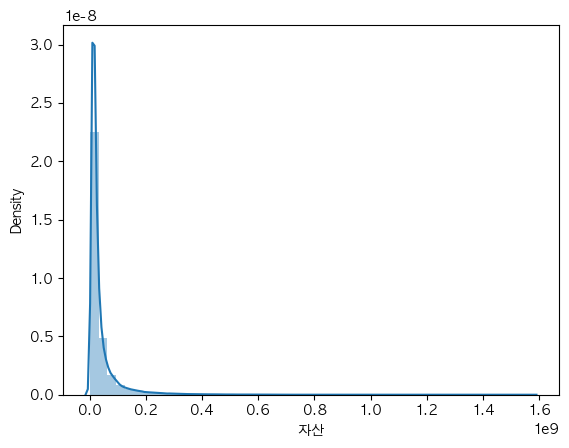

/var/folders/k5/s7jd1sh12dq55cnhmb7v_4sr0000gn/T/ipykernel_134/2597565465.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[c])


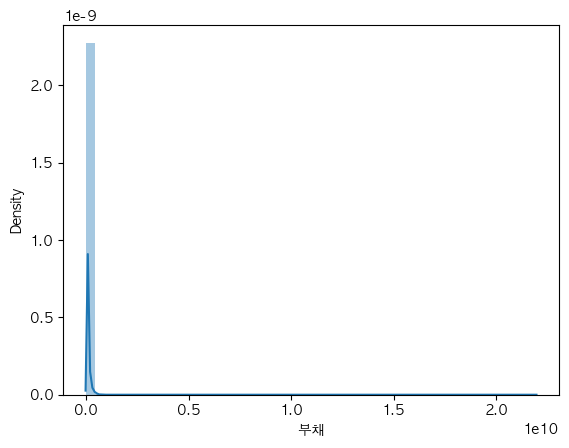

/var/folders/k5/s7jd1sh12dq55cnhmb7v_4sr0000gn/T/ipykernel_134/2597565465.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[c])


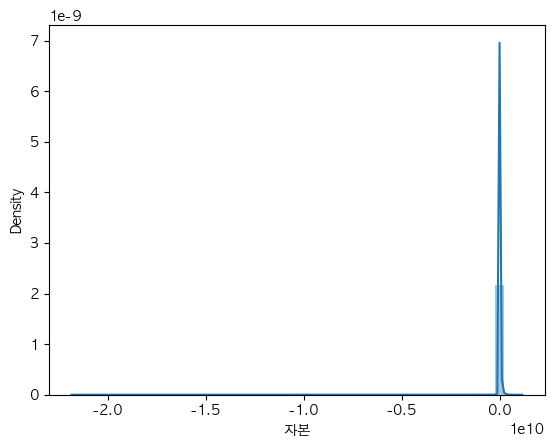

/var/folders/k5/s7jd1sh12dq55cnhmb7v_4sr0000gn/T/ipykernel_134/2597565465.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[c])


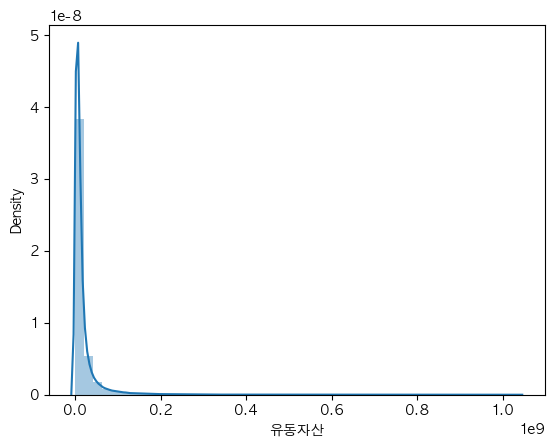

/var/folders/k5/s7jd1sh12dq55cnhmb7v_4sr0000gn/T/ipykernel_134/2597565465.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[c])


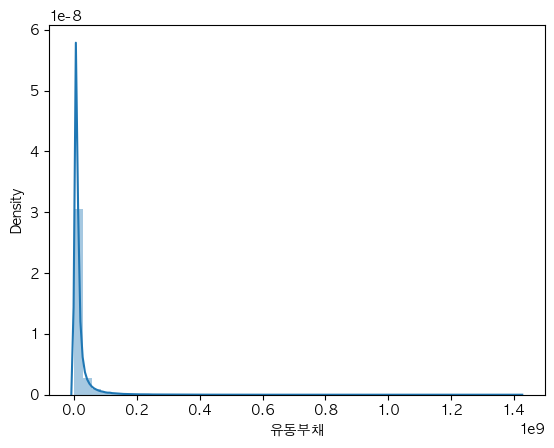

/var/folders/k5/s7jd1sh12dq55cnhmb7v_4sr0000gn/T/ipykernel_134/2597565465.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[c])


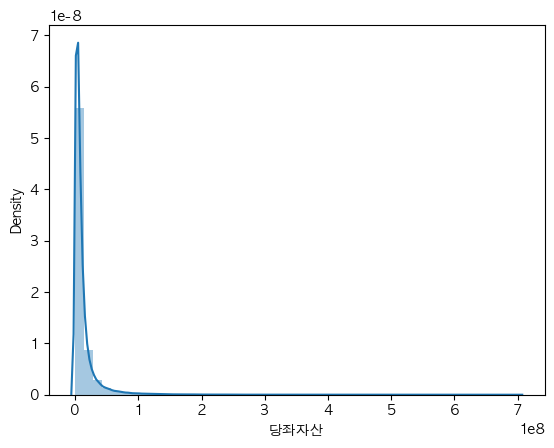

/var/folders/k5/s7jd1sh12dq55cnhmb7v_4sr0000gn/T/ipykernel_134/2597565465.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[c])


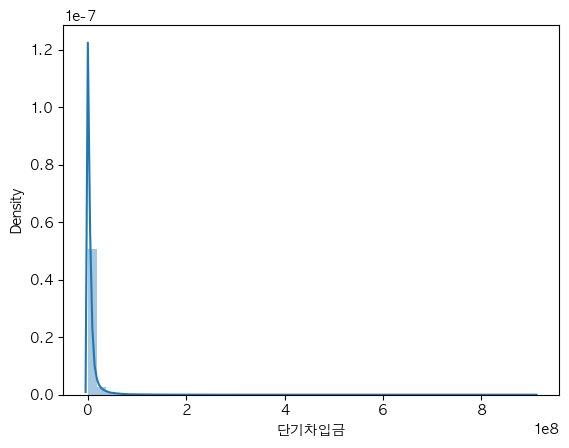

/var/folders/k5/s7jd1sh12dq55cnhmb7v_4sr0000gn/T/ipykernel_134/2597565465.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[c])


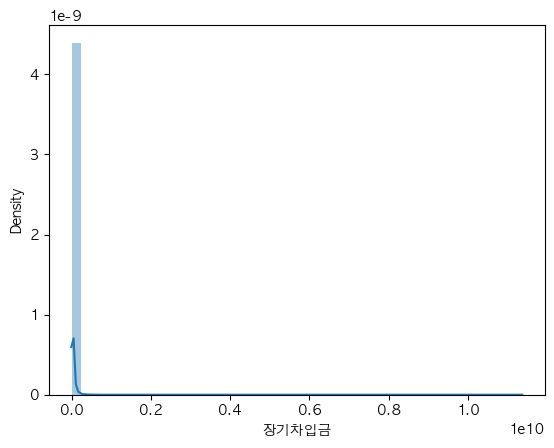

/var/folders/k5/s7jd1sh12dq55cnhmb7v_4sr0000gn/T/ipykernel_134/2597565465.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[c])


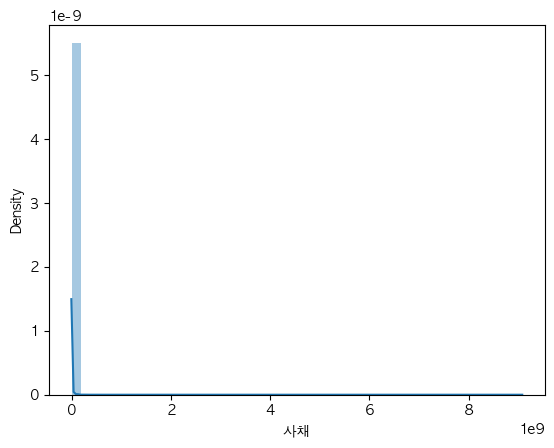

/var/folders/k5/s7jd1sh12dq55cnhmb7v_4sr0000gn/T/ipykernel_134/2597565465.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[c])


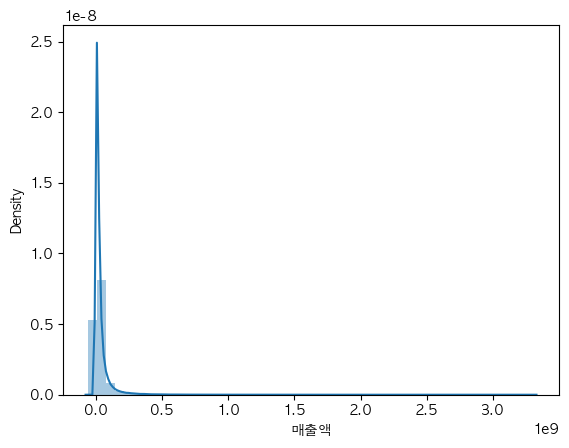

/var/folders/k5/s7jd1sh12dq55cnhmb7v_4sr0000gn/T/ipykernel_134/2597565465.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[c])


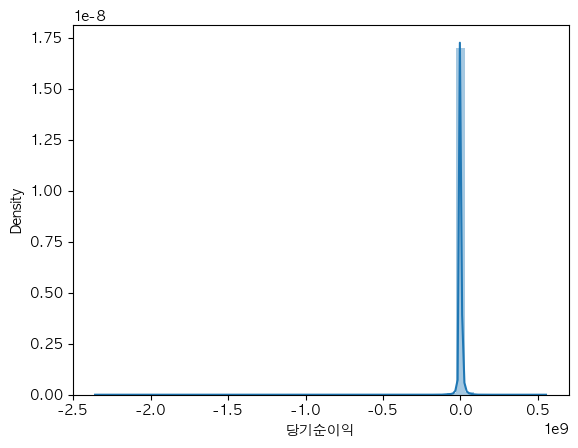

/var/folders/k5/s7jd1sh12dq55cnhmb7v_4sr0000gn/T/ipykernel_134/2597565465.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[c])


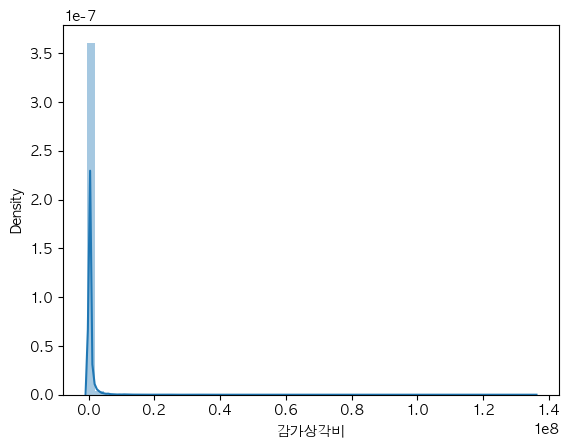

/var/folders/k5/s7jd1sh12dq55cnhmb7v_4sr0000gn/T/ipykernel_134/2597565465.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[c])


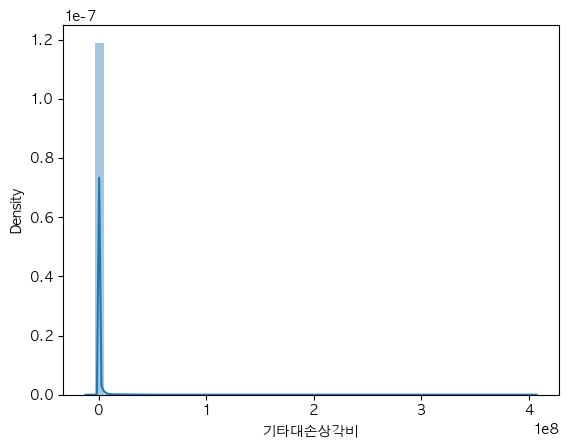

/var/folders/k5/s7jd1sh12dq55cnhmb7v_4sr0000gn/T/ipykernel_134/2597565465.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[c])


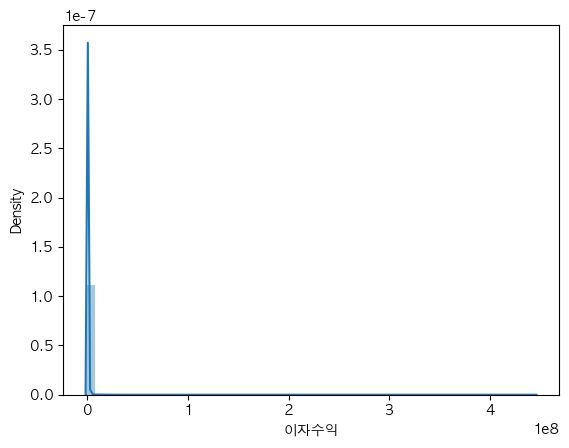

/var/folders/k5/s7jd1sh12dq55cnhmb7v_4sr0000gn/T/ipykernel_134/2597565465.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[c])


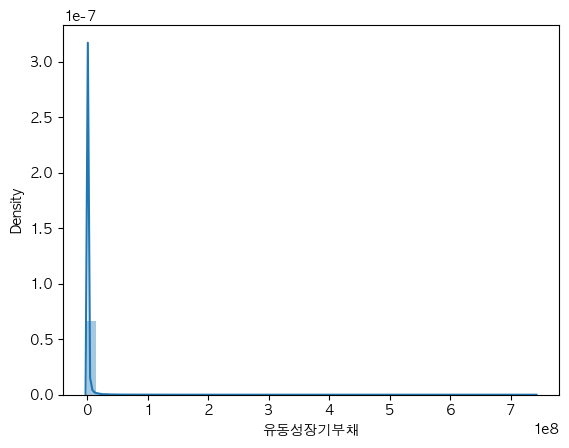

/var/folders/k5/s7jd1sh12dq55cnhmb7v_4sr0000gn/T/ipykernel_134/2597565465.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[c])


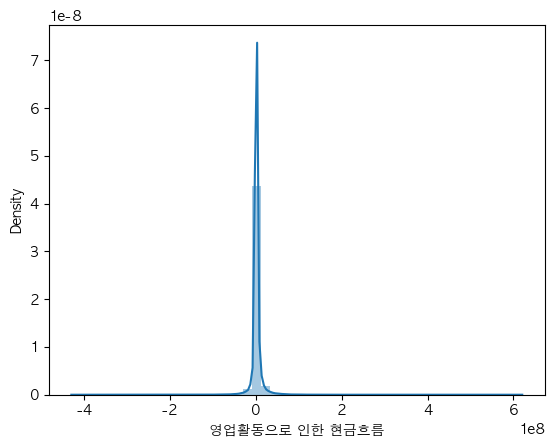

/var/folders/k5/s7jd1sh12dq55cnhmb7v_4sr0000gn/T/ipykernel_134/2597565465.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[c])


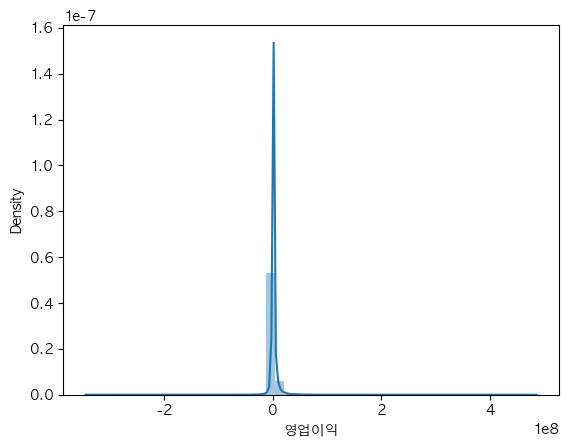

/var/folders/k5/s7jd1sh12dq55cnhmb7v_4sr0000gn/T/ipykernel_134/2597565465.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[c])


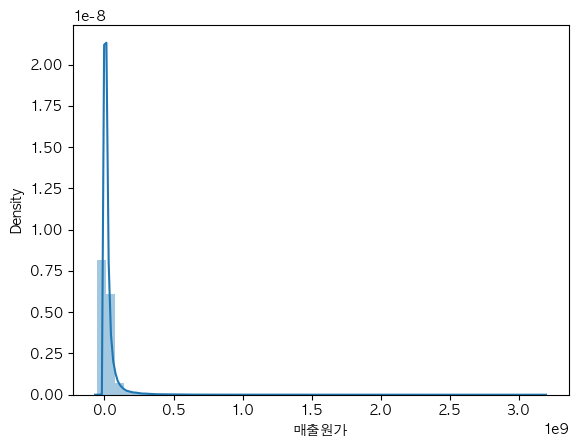

/var/folders/k5/s7jd1sh12dq55cnhmb7v_4sr0000gn/T/ipykernel_134/2597565465.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[c])


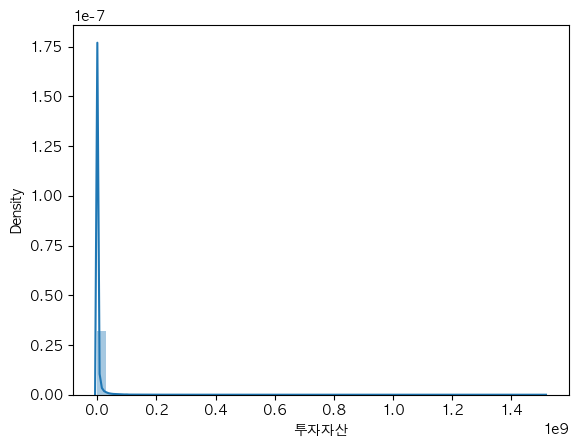

/var/folders/k5/s7jd1sh12dq55cnhmb7v_4sr0000gn/T/ipykernel_134/2597565465.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[c])


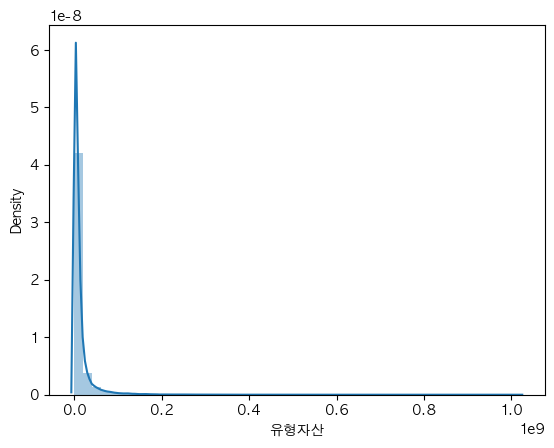

/var/folders/k5/s7jd1sh12dq55cnhmb7v_4sr0000gn/T/ipykernel_134/2597565465.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[c])


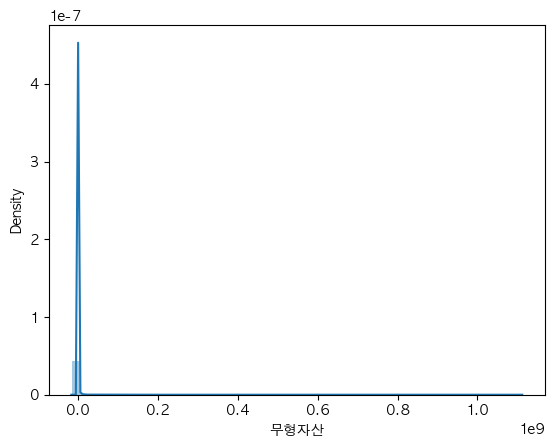

/var/folders/k5/s7jd1sh12dq55cnhmb7v_4sr0000gn/T/ipykernel_134/2597565465.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[c])


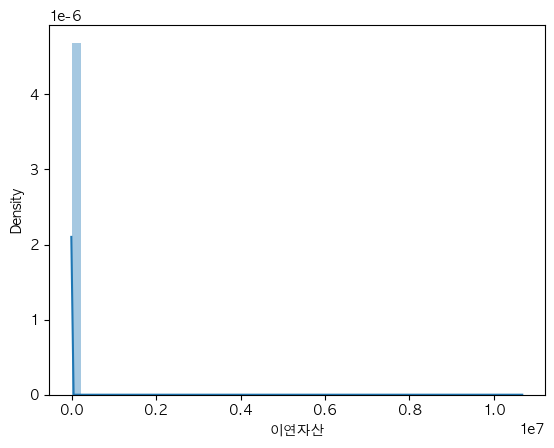

/var/folders/k5/s7jd1sh12dq55cnhmb7v_4sr0000gn/T/ipykernel_134/2597565465.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[c])


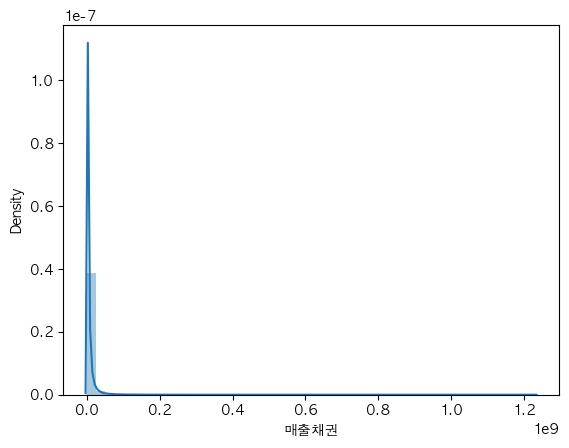

/var/folders/k5/s7jd1sh12dq55cnhmb7v_4sr0000gn/T/ipykernel_134/2597565465.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[c])


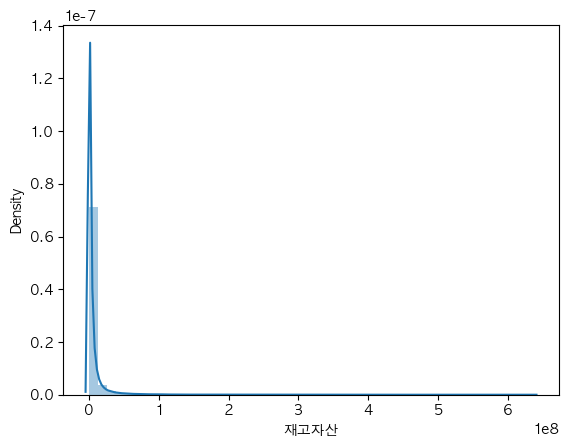

/var/folders/k5/s7jd1sh12dq55cnhmb7v_4sr0000gn/T/ipykernel_134/2597565465.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[c])


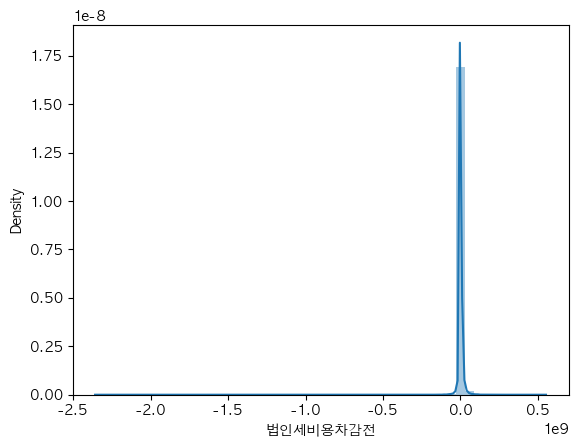

/var/folders/k5/s7jd1sh12dq55cnhmb7v_4sr0000gn/T/ipykernel_134/2597565465.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[c])


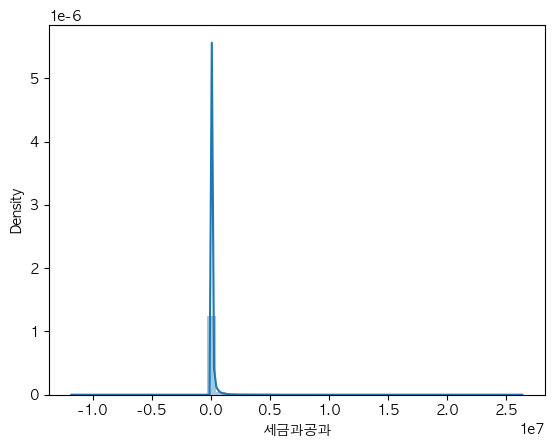

/var/folders/k5/s7jd1sh12dq55cnhmb7v_4sr0000gn/T/ipykernel_134/2597565465.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[c])


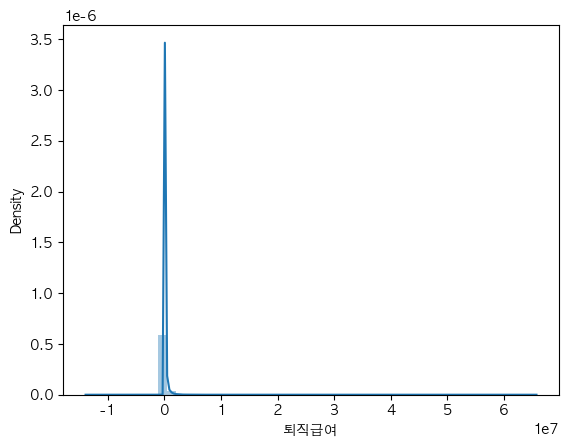

/var/folders/k5/s7jd1sh12dq55cnhmb7v_4sr0000gn/T/ipykernel_134/2597565465.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[c])


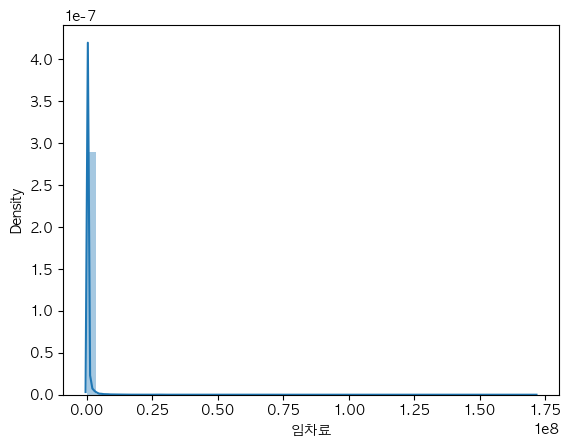

/var/folders/k5/s7jd1sh12dq55cnhmb7v_4sr0000gn/T/ipykernel_134/2597565465.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[c])


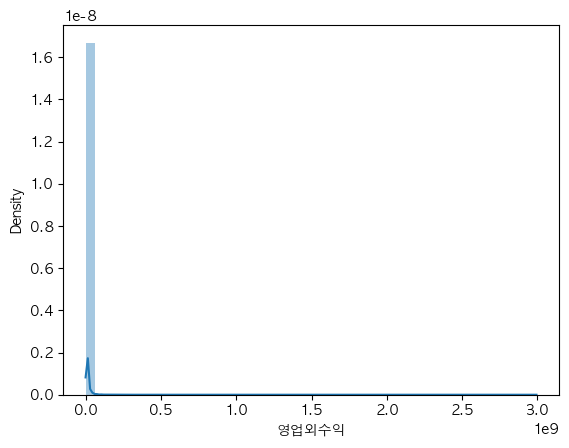

/var/folders/k5/s7jd1sh12dq55cnhmb7v_4sr0000gn/T/ipykernel_134/2597565465.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[c])


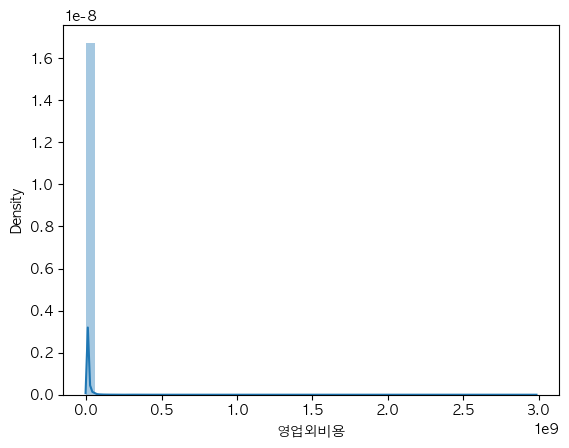

/var/folders/k5/s7jd1sh12dq55cnhmb7v_4sr0000gn/T/ipykernel_134/2597565465.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[c])


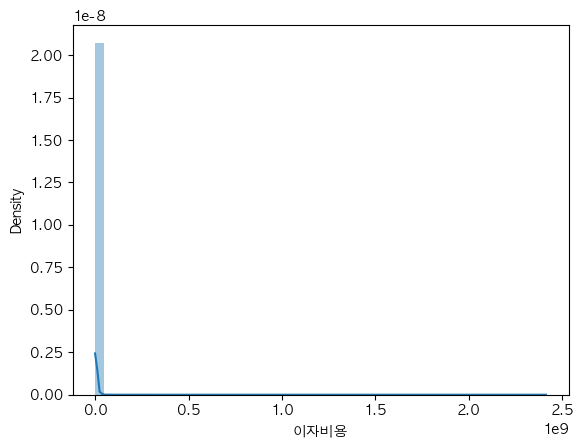

In [220]:
col = df.columns[3:-1]
for c in col:
    sns.distplot(df[c])
    plt.show()

#### 재무비율 변수 생성

In [221]:
# 안정성
df['자기자본비율'] = df['자본']/(df['자산']) * 100
df['부채비율'] = df['부채']/df['자본'] * 100
df['유동비율'] = df['유동자산']/df['유동부채'] * 100
df['당좌비율'] = df['당좌자산']/df['유동부채'] * 100
df['차입금의존도'] = (df['장기차입금'] + df['단기차입금'] + df['사채']) / df['자산'] * 100
df['OCF'] = df['영업활동으로 인한 현금흐름']

In [222]:
# 수익성
df['경상이익'] = df['영업이익'] + df['영업외수익'] - df['영업외비용']
df['총자산이익률'] = df['당기순이익'] / df['자산'] * 100
df['총자본경상이익률'] = df['경상이익'] / df['자산'] * 100
df['자기자본순이익률'] = df['당기순이익'] / df['자본'] * 100
df['매출액경상이익률'] = df['경상이익'] / df['매출액'] * 100
df['자기자본영업이익률'] = df['영업이익']/df['자본']*100
df['매출액영업이익률'] = df['영업이익'] / df['매출액'] * 100
df['매출원가율'] = df['매출원가'] / df['매출액'] * 100
df['이자보상배율'] = df['영업이익'] / df['이자비용'] * 100

In [223]:
# 활동성
df['총자본회전율'] = df['매출액'] / df['자산'] * 100
df['자기자본회전율'] = df['매출액'] / df['자본'] * 100
df['고정자산'] = df['투자자산'] + df['유형자산'] + df['무형자산'] + df['이연자산']
df['고정자산회전율'] = df['매출액'] / (df['고정자산'] + df['투자자산']) * 100
df['재고자산회전율'] = df['매출액'] / df['재고자산'] * 100
df['매출채권회전율'] = df['매출액'] / df['매출채권'] * 100
df['순운전자본'] = df['유동자산'] - df['유동부채'] * 100
df['순운전자본회전율'] = df['매출액'] / df['순운전자본'] * 100

In [224]:
# 성장성
df['총자본증가율'] = (df['자산'] - df.sort_values(by='회계년도', ascending=True).groupby('거래소코드')['자산'].shift(1)) / df.sort_values(by='회계년도', ascending=True).groupby('거래소코드')['자산'].shift(1) * 100
df['총자본증가율'] = (df['자본'] - df.sort_values(by='회계년도', ascending=True).groupby('거래소코드')['자본'].shift(1)) / df.sort_values(by='회계년도', ascending=True).groupby('거래소코드')['자본'].shift(1) * 100
df['유형자산증가율'] = (df['유형자산'] - df.sort_values(by='회계년도', ascending=True).groupby('거래소코드')['유형자산'].shift(1)) / df.sort_values(by='회계년도', ascending=True).groupby('거래소코드')['유형자산'].shift(1) * 100
df['매출액증가율'] = (df['매출액'] - df.sort_values(by='회계년도', ascending=True).groupby('거래소코드')['매출액'].shift(1)) / df.sort_values(by='회계년도', ascending=True).groupby('거래소코드')['매출액'].shift(1) * 100
df['순이익증가율'] = (df['당기순이익'] - df.sort_values(by='회계년도', ascending=True).groupby('거래소코드')['당기순이익'].shift(1)) / df.sort_values(by='회계년도', ascending=True).groupby('거래소코드')['당기순이익'].shift(1) * 100

#### 재무비율 계산 후 이상치 처리

##### NaN 처리

In [225]:
df.drop(df.sort_values(by='회계년도', ascending=True).groupby('거래소코드').head(1).index, inplace=True)

In [226]:
df.columns[df.isnull().sum() > 0]

Index(['자기자본비율', '부채비율', '유동비율', '당좌비율', '차입금의존도', '총자본경상이익률', '매출액경상이익률',
       '자기자본영업이익률', '매출액영업이익률', '매출원가율', '이자보상배율', '총자본회전율', '자기자본회전율',
       '고정자산회전율', '재고자산회전율', '매출채권회전율', '순운전자본회전율', '유형자산증가율', '매출액증가율',
       '순이익증가율'],
      dtype='object')

In [227]:
df[df['자기자본비율'].isnull()]

,거래소코드,회사명,회계년도,자산,부채,자본,유동자산,유동부채,당좌자산,단기차입금,...,고정자산,고정자산회전율,재고자산회전율,매출채권회전율,순운전자본,순운전자본회전율,총자본증가율,유형자산증가율,매출액증가율,순이익증가율
162760,53613,위트러스트에셋(주),2015,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,NaN,NaN,NaN,0.00000,NaN,-100.00000,-100.00000,-100.00000,-8.33175
198556,61386,하이스텍주식회사,2011,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,inf,inf,inf,0.00000,inf,-100.00000,-100.00000,170.49924,-2369.69062
223319,50077,(주)씨스테인웨그웨어하우징,2008,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,inf,inf,inf,0.00000,inf,-100.00000,-100.00000,26.40571,61.51570


In [228]:
len(df[df['자기자본비율'].isnull()])

3

In [229]:
df.drop(df[df['자기자본비율'].isnull()].index, inplace=True)

In [230]:
df[df['차입금의존도'].isnull()]

,거래소코드,회사명,회계년도,자산,부채,자본,유동자산,유동부채,당좌자산,단기차입금,...,고정자산,고정자산회전율,재고자산회전율,매출채권회전율,순운전자본,순운전자본회전율,총자본증가율,유형자산증가율,매출액증가율,순이익증가율
147807,46222,(주)미르이앤씨,2014,0.00000,148143083.00000,-148143083.00000,0.00000,148143083.00000,0.00000,0.00000,...,0.00000,inf,inf,inf,-14814308300.00000,-2.07162,77.09316,-100.00000,11253885.69857,819.24283
177348,50708,(주)피엘디앤씨,2010,0.00000,28368019.00000,-28368019.00000,0.00000,28368019.00000,0.00000,0.00000,...,0.00000,inf,inf,inf,-2836801900.00000,-2.25624,6368.69725,-100.00000,inf,3672.89481
188630,43144,(주)현민기연,2007,0.00000,48174.00000,-48174.00000,0.00000,48174.00000,0.00000,0.00000,...,0.00000,inf,inf,inf,-4817400.00000,-370.45114,-101.70086,-100.00000,-3.19483,-580.95042


In [231]:
len(df[df['차입금의존도'].isnull()])

3

In [232]:
df['차입금의존도'] = df['차입금의존도'].fillna(0.0)

In [233]:
df[df['매출액경상이익률'].isnull()]

,거래소코드,회사명,회계년도,자산,부채,자본,유동자산,유동부채,당좌자산,단기차입금,...,고정자산,고정자산회전율,재고자산회전율,매출채권회전율,순운전자본,순운전자본회전율,총자본증가율,유형자산증가율,매출액증가율,순이익증가율
9581,28336,동부철구주식회사,2016,15482469.00000,1397199.00000,14085270.00000,2881928.00000,759163.00000,2881928.00000,0.00000,...,12600541.00000,0.00000,NaN,0.00000,-73034372.00000,-0.00000,-62.63043,-79.49600,-100.00000,1500.54755
11713,73026,선일기업(주),2015,12587394.00000,4100183.00000,8487211.00000,9778978.00000,3823714.00000,9564585.00000,0.00000,...,2625416.00000,0.00000,0.00000,0.00000,-372592422.00000,-0.00000,0.00000,0.00000,NaN,NaN
33189,44672,요크인터내셔날(주),2009,106045.00000,1105817.00000,-999772.00000,106045.00000,1105817.00000,106045.00000,1100000.00000,...,0.00000,NaN,NaN,NaN,-110475655.00000,-0.00000,-8.85552,-100.00000,-100.00000,-112.43898
43598,50648,(주)아로마엘에스티,2013,10581132.00000,4111492.00000,6469640.00000,226293.00000,4111492.00000,226293.00000,4091854.00000,...,10344838.00000,0.00000,NaN,NaN,-410922907.00000,-0.00000,0.00000,NaN,NaN,-100.00000
48984,19875,닥터하우스,2015,1247060.00000,1286240.00000,-39180.00000,907493.00000,1214948.00000,907493.00000,0.00000,...,339307.00000,0.00000,NaN,NaN,-120587307.00000,-0.00000,-116.08249,-100.00000,-100.00000,-5709.99802
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267709,39781,주식회사대명수안,2003,85501103.00000,85201103.00000,300000.00000,85461103.00000,30201103.00000,83872372.00000,2322072.00000,...,10000.00000,0.00000,0.00000,NaN,-2934649197.00000,-0.00000,0.00000,0.00000,NaN,NaN
267710,39781,주식회사대명수안,2004,103325356.00000,103025356.00000,300000.00000,103293702.00000,48025356.00000,101139585.00000,20146325.00000,...,1655.00000,0.00000,0.00000,NaN,-4699241898.00000,-0.00000,0.00000,-83.45000,NaN,NaN
267711,39781,주식회사대명수안,2005,108508817.00000,108208817.00000,300000.00000,108477909.00000,53208817.00000,105585608.00000,25327784.00000,...,908.00000,0.00000,0.00000,NaN,-5212403791.00000,-0.00000,0.00000,-45.13595,NaN,NaN
272798,19144,청우건설,2009,33615609.00000,80463511.00000,-46847902.00000,33000083.00000,63274527.00000,9549932.00000,19964000.00000,...,615526.00000,0.00000,0.00000,NaN,-6294452617.00000,-0.00000,6.30378,-71.29126,NaN,-100.00000


In [234]:
len(df[(df['매출액경상이익률'].isnull()) & (df['매출액']==0.0) & (df['경상이익']==0.0)])

66

In [235]:
df['매출액경상이익률'] = df['매출액경상이익률'].fillna(0.0)

In [236]:
df[df['매출액영업이익률'].isnull()]

,거래소코드,회사명,회계년도,자산,부채,자본,유동자산,유동부채,당좌자산,단기차입금,...,고정자산,고정자산회전율,재고자산회전율,매출채권회전율,순운전자본,순운전자본회전율,총자본증가율,유형자산증가율,매출액증가율,순이익증가율
9581,28336,동부철구주식회사,2016,15482469.00000,1397199.00000,14085270.00000,2881928.00000,759163.00000,2881928.00000,0.00000,...,12600541.00000,0.00000,NaN,0.00000,-73034372.00000,-0.00000,-62.63043,-79.49600,-100.00000,1500.54755
9865,65106,동양특수유리주식회사,2011,8168051.00000,8150830.00000,17221.00000,4161075.00000,3044289.00000,1298137.00000,2885472.00000,...,3786023.00000,0.00000,0.00000,0.00000,-300267825.00000,-0.00000,0.00000,0.00000,NaN,0.00000
11713,73026,선일기업(주),2015,12587394.00000,4100183.00000,8487211.00000,9778978.00000,3823714.00000,9564585.00000,0.00000,...,2625416.00000,0.00000,0.00000,0.00000,-372592422.00000,-0.00000,0.00000,0.00000,NaN,NaN
21297,19802,한국상-고방베트로텍스주식회사,2008,17816908.00000,25093552.00000,-7276644.00000,1308007.00000,25093552.00000,1308007.00000,18700000.00000,...,16481967.00000,0.00000,NaN,NaN,-2508047193.00000,-0.00000,-26.00484,-12.30672,-100.00000,-105.28617
21298,19802,한국상-고방베트로텍스주식회사,2008,17816908.00000,25093552.00000,-7276644.00000,1308007.00000,25093552.00000,1308007.00000,18700000.00000,...,16481967.00000,0.00000,NaN,NaN,-2508047193.00000,-0.00000,-0.00000,0.00000,NaN,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273615,61327,푸른제천지키미주식회사,2012,72712695.00000,64819491.00000,7893204.00000,1393235.00000,5730019.00000,1393235.00000,0.00000,...,71319460.00000,0.00000,NaN,NaN,-571608665.00000,-0.00000,0.00435,35.45559,NaN,-82.20954
275140,46888,(주)비큐공영,2008,3014544.00000,5364854.00000,-2350310.00000,1270700.00000,5197606.00000,1270700.00000,4285579.00000,...,227.00000,0.00000,NaN,0.00000,-518489900.00000,-0.00000,172.24467,-99.99641,-100.00000,67.48420
278837,47300,반도모터스(주),2011,6636066.00000,10022898.00000,-3386832.00000,6275527.00000,10022898.00000,6081093.00000,600000.00000,...,90539.00000,0.00000,0.00000,0.00000,-996014273.00000,-0.00000,-5539.90748,-99.27316,-100.00000,472.68946
280787,30329,저먼모터스(주),2008,12516024.00000,23474901.00000,-10958877.00000,4542032.00000,22980744.00000,4542032.00000,16693849.00000,...,7973993.00000,0.00000,NaN,0.00000,-2293532368.00000,-0.00000,-1628.78441,-99.91264,-100.00000,107.84123


In [237]:
len(df[(df['매출액영업이익률'].isnull()) & (df['매출액']==0.0) & (df['영업이익']==0.0)])

149

In [238]:
df['매출액영업이익률'] = df['매출액영업이익률'].fillna(0.0)

In [239]:
df[df['매출원가율'].isnull()]

,거래소코드,회사명,회계년도,자산,부채,자본,유동자산,유동부채,당좌자산,단기차입금,...,고정자산,고정자산회전율,재고자산회전율,매출채권회전율,순운전자본,순운전자본회전율,총자본증가율,유형자산증가율,매출액증가율,순이익증가율
1112,78840,(주)대영산전,2016,8655514.00000,8265453.00000,390060.00000,8625514.00000,8265453.00000,5290.00000,8265454.00000,...,0.00000,NaN,0.00000,NaN,-817919786.00000,-0.00000,41.89934,-100.00000,NaN,-233.36305
1113,78840,(주)대영산전,2017,9121543.00000,8777356.00000,344187.00000,9090099.00000,8777356.00000,15521.00000,8772246.00000,...,1444.00000,0.00000,0.00000,NaN,-868645501.00000,-0.00000,-11.76050,inf,NaN,-139.82896
2418,66365,(주)보다글라스,2012,20161921.00000,21021260.00000,-859340.00000,697552.00000,14481260.00000,535870.00000,13470129.00000,...,19334019.00000,0.00000,0.00000,NaN,-1447428448.00000,-0.00000,-0.00000,0.00000,NaN,-0.00000
3000,57927,(주)삼표기초소재,2009,14957651.00000,110.00000,14957541.00000,13287723.00000,110.00000,13287723.00000,0.00000,...,1669929.00000,0.00000,NaN,NaN,13276723.00000,0.00000,0.00000,0.00000,NaN,-0.00000
4313,30547,(주)아이스텍,2009,760918.00000,108764.00000,652154.00000,567865.00000,42597.00000,567865.00000,0.00000,...,13052.00000,0.00000,NaN,NaN,-3691835.00000,-0.00000,-6035.68763,-48.59180,-100.00000,156.05427
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284020,50421,효성도시개발(주),2013,301785178.00000,494615843.00000,-192830665.00000,301626807.00000,494577343.00000,70346097.00000,281774268.00000,...,128570.00000,0.00000,0.00000,NaN,-49156107493.00000,-0.00000,35.79020,344.64172,NaN,39226.77427
284023,50421,효성도시개발(주),2016,302350875.00000,654746878.00000,-352396003.00000,302243084.00000,654708378.00000,71164077.00000,398478331.00000,...,80031.00000,0.00000,0.00000,0.00000,-65168594716.00000,-0.00000,23.57200,-69.22276,-100.00000,226.94839
284024,50421,효성도시개발(주),2017,302996247.00000,868059983.00000,-565063736.00000,302908278.00000,868021483.00000,71675501.00000,399283739.00000,...,59109.00000,0.00000,0.00000,NaN,-86499240022.00000,-0.00000,60.34908,-94.86122,NaN,216.36922
284066,46454,효자산업(주),2009,17370246.00000,2237710.00000,15132536.00000,975942.00000,1761102.00000,956019.00000,1306940.00000,...,16093235.00000,0.00000,0.00000,NaN,-175134258.00000,-0.00000,1.79561,-0.31477,-100.00000,-96.98169


In [240]:
len(df[(df['매출원가율'].isnull()) & (df['매출액']==0.0) & (df['매출원가']==0.0)])

9731

In [241]:
df['매출원가율'] = df['매출원가율'].fillna(0.0)

In [242]:
df[df['이자보상배율'].isnull()]

,거래소코드,회사명,회계년도,자산,부채,자본,유동자산,유동부채,당좌자산,단기차입금,...,고정자산,고정자산회전율,재고자산회전율,매출채권회전율,순운전자본,순운전자본회전율,총자본증가율,유형자산증가율,매출액증가율,순이익증가율
9581,28336,동부철구주식회사,2016,15482469.00000,1397199.00000,14085270.00000,2881928.00000,759163.00000,2881928.00000,0.00000,...,12600541.00000,0.00000,NaN,0.00000,-73034372.00000,-0.00000,-62.63043,-79.49600,-100.00000,1500.54755
9865,65106,동양특수유리주식회사,2011,8168051.00000,8150830.00000,17221.00000,4161075.00000,3044289.00000,1298137.00000,2885472.00000,...,3786023.00000,0.00000,0.00000,0.00000,-300267825.00000,-0.00000,0.00000,0.00000,NaN,0.00000
11713,73026,선일기업(주),2015,12587394.00000,4100183.00000,8487211.00000,9778978.00000,3823714.00000,9564585.00000,0.00000,...,2625416.00000,0.00000,0.00000,0.00000,-372592422.00000,-0.00000,0.00000,0.00000,NaN,NaN
21700,66099,한남시멘트주식회사,2012,15224313.00000,680000.00000,14544313.00000,15224313.00000,680000.00000,15224313.00000,20000.00000,...,0.00000,NaN,NaN,NaN,-52775687.00000,-0.00000,0.00000,NaN,NaN,-0.00000
33189,44672,요크인터내셔날(주),2009,106045.00000,1105817.00000,-999772.00000,106045.00000,1105817.00000,106045.00000,1100000.00000,...,0.00000,NaN,NaN,NaN,-110475655.00000,-0.00000,-8.85552,-100.00000,-100.00000,-112.43898
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273595,48128,푸른아산지키미주식회사,2009,72479727.00000,62253619.00000,10226108.00000,1459292.00000,275.00000,1459292.00000,0.00000,...,71020435.00000,0.00000,NaN,NaN,1431792.00000,0.00000,0.00518,66.65467,NaN,-52.46637
273614,61327,푸른제천지키미주식회사,2011,54166953.00000,46274092.00000,7892861.00000,1515407.00000,2574620.00000,1515407.00000,0.00000,...,52651546.00000,0.00000,NaN,NaN,-255946593.00000,-0.00000,0.02443,83.53237,NaN,-437.65324
273615,61327,푸른제천지키미주식회사,2012,72712695.00000,64819491.00000,7893204.00000,1393235.00000,5730019.00000,1393235.00000,0.00000,...,71319460.00000,0.00000,NaN,NaN,-571608665.00000,-0.00000,0.00435,35.45559,NaN,-82.20954
273644,58547,푸른한강타운주식회사,2010,83764919.00000,73360149.00000,10404770.00000,873240.00000,1110149.00000,873240.00000,0.00000,...,0.00000,inf,inf,inf,-110141660.00000,-47.92732,-0.08838,NaN,75.07278,-130.58214


In [243]:
len(df[(df['이자보상배율'].isnull()) & (df['영업이익'] == 0.0) & (df['이자비용'] == 0.0)])

142

In [244]:
df['이자보상배율'] = df['이자보상배율'].fillna(0.0)

In [245]:
df[df['총자본회전율'].isnull()]

,거래소코드,회사명,회계년도,자산,부채,자본,유동자산,유동부채,당좌자산,단기차입금,...,고정자산,고정자산회전율,재고자산회전율,매출채권회전율,순운전자본,순운전자본회전율,총자본증가율,유형자산증가율,매출액증가율,순이익증가율
210827,45080,(주)엔스퍼트,2015,0.00000,22390035.00000,-22390035.00000,0.00000,21804692.00000,0.00000,5302669.00000,...,0.00000,NaN,NaN,0.00000,-2180469200.00000,-0.00000,-461.29585,-100.00000,-100.00000,-102.17656


In [246]:
len(df[(df['총자본회전율'].isnull()) & (df['매출액'] == 0.0) & (df['자산'] == 0.0)])

1

In [247]:
df['총자본회전율'] = df['총자본회전율'].fillna(0.0)

In [248]:
df[df['고정자산회전율'].isnull()]

,거래소코드,회사명,회계년도,자산,부채,자본,유동자산,유동부채,당좌자산,단기차입금,...,고정자산,고정자산회전율,재고자산회전율,매출채권회전율,순운전자본,순운전자본회전율,총자본증가율,유형자산증가율,매출액증가율,순이익증가율
1112,78840,(주)대영산전,2016,8655514.00000,8265453.00000,390060.00000,8625514.00000,8265453.00000,5290.00000,8265454.00000,...,0.00000,NaN,0.00000,NaN,-817919786.00000,-0.00000,41.89934,-100.00000,NaN,-233.36305
21700,66099,한남시멘트주식회사,2012,15224313.00000,680000.00000,14544313.00000,15224313.00000,680000.00000,15224313.00000,20000.00000,...,0.00000,NaN,NaN,NaN,-52775687.00000,-0.00000,0.00000,NaN,NaN,-0.00000
33189,44672,요크인터내셔날(주),2009,106045.00000,1105817.00000,-999772.00000,106045.00000,1105817.00000,106045.00000,1100000.00000,...,0.00000,NaN,NaN,NaN,-110475655.00000,-0.00000,-8.85552,-100.00000,-100.00000,-112.43898
35518,76159,주식회사에스티에스프로바이더,2016,255283.00000,10620452.00000,-10365169.00000,250363.00000,10620452.00000,250363.00000,0.00000,...,0.00000,NaN,NaN,0.00000,-1061794837.00000,-0.00000,-629.72921,NaN,NaN,17179.77366
40024,59417,(주)나라에이스홀딩스,2010,7834271.00000,116270.00000,7718001.00000,7834271.00000,116270.00000,7834271.00000,0.00000,...,0.00000,NaN,NaN,NaN,-3792729.00000,-0.00000,-7.17775,NaN,NaN,-107.73997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282544,58818,창해산업개발주식회사,2011,29698951.00000,31416349.00000,-1717398.00000,29697951.00000,2609989.00000,280362.00000,2559440.00000,...,0.00000,NaN,0.00000,NaN,-231300949.00000,-0.00000,58.70357,-100.00000,NaN,-18.13680
283232,49603,한유주택주식회사,2012,162468991.00000,268862211.00000,-106393220.00000,162468991.00000,268862211.00000,5628232.00000,252576637.00000,...,0.00000,NaN,0.00000,NaN,-26723752109.00000,-0.00000,-32.74688,-100.00000,NaN,-402.12179
283233,49603,한유주택주식회사,2013,161751503.00000,276163287.00000,-114411784.00000,161751503.00000,276163287.00000,4729547.00000,259182934.00000,...,0.00000,NaN,0.00000,NaN,-27454577197.00000,-0.00000,7.53672,NaN,NaN,-115.47837
283763,40238,화삼개발주식회사,2017,8217861.00000,9665831.00000,-1447970.00000,8162581.00000,9602671.00000,3206096.00000,7049000.00000,...,0.00000,NaN,0.00000,NaN,-952104519.00000,-0.00000,-223.28731,-100.00000,-100.00000,-2868.55319


In [249]:
len(df[(df['고정자산회전율'].isnull()) & (df['매출액'] == 0.0) & (df['고정자산'] == 0.0) & ((df['투자자산'] == 0.0))])

1211

In [250]:
df['고정자산회전율'] = df['고정자산회전율'].fillna(0.0)

In [251]:
df[df['재고자산회전율'].isnull()]

,거래소코드,회사명,회계년도,자산,부채,자본,유동자산,유동부채,당좌자산,단기차입금,...,고정자산,고정자산회전율,재고자산회전율,매출채권회전율,순운전자본,순운전자본회전율,총자본증가율,유형자산증가율,매출액증가율,순이익증가율
3000,57927,(주)삼표기초소재,2009,14957651.00000,110.00000,14957541.00000,13287723.00000,110.00000,13287723.00000,0.00000,...,1669929.00000,0.00000,NaN,NaN,13276723.00000,0.00000,0.00000,0.00000,NaN,-0.00000
4313,30547,(주)아이스텍,2009,760918.00000,108764.00000,652154.00000,567865.00000,42597.00000,567865.00000,0.00000,...,13052.00000,0.00000,NaN,NaN,-3691835.00000,-0.00000,-6035.68763,-48.59180,-100.00000,156.05427
4314,30547,(주)아이스텍,2010,369934.00000,125125.00000,244809.00000,162165.00000,41959.00000,162165.00000,0.00000,...,27769.00000,0.00000,NaN,NaN,-4033735.00000,-0.00000,-62.46147,112.76531,NaN,9.74565
4759,56782,(주)에프앤에프인베스트먼트,2009,1986500.00000,5918457.00000,-3931957.00000,678933.00000,5918457.00000,678933.00000,4238395.00000,...,1307267.00000,0.00000,NaN,NaN,-591166767.00000,-0.00000,-214.79342,3591900.00000,-100.00000,-247.30648
4835,58773,(주)연호,2010,28322776.00000,26036546.00000,2286230.00000,9021.00000,26036546.00000,9021.00000,25986763.00000,...,28293756.00000,0.00000,NaN,NaN,-2603645579.00000,-0.00000,-17.01124,27.76667,NaN,104.49630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283671,49715,호성주택(주),2010,1322161.00000,1174655.00000,147505.00000,1303550.00000,1148479.00000,1303550.00000,0.00000,...,8611.00000,0.00000,NaN,NaN,-113544350.00000,-0.00000,-101.09572,-45.09927,NaN,-352.88165
283728,63224,홍성맑은물사랑주식회사,2012,39499219.00000,35668315.00000,3830904.00000,1389929.00000,2933315.00000,1389929.00000,0.00000,...,38104290.00000,0.00000,NaN,NaN,-291941571.00000,-0.00000,-1.76973,145.58900,NaN,24.52503
283729,63224,홍성맑은물사랑주식회사,2013,71276132.00000,67604245.00000,3671887.00000,1629611.00000,1534245.00000,1629611.00000,0.00000,...,69641521.00000,0.00000,NaN,NaN,-151794889.00000,-0.00000,-4.15090,-99.99834,NaN,130.39932
283784,43828,화성건설주식회사,2011,6527407.00000,259513.00000,6267894.00000,6470784.00000,259513.00000,6470784.00000,0.00000,...,51622.00000,0.00000,NaN,NaN,-19480516.00000,-0.00000,-128.51972,-10.71330,NaN,-784.86809


In [252]:
len(df[(df['재고자산회전율'].isnull()) & (df['매출액'] == 0.0) & (df['재고자산'] == 0.0)])

5761

In [253]:
df['재고자산회전율'] = df['재고자산회전율'].fillna(0.0)

In [254]:
df[df['매출채권회전율'].isnull()]

,거래소코드,회사명,회계년도,자산,부채,자본,유동자산,유동부채,당좌자산,단기차입금,...,고정자산,고정자산회전율,재고자산회전율,매출채권회전율,순운전자본,순운전자본회전율,총자본증가율,유형자산증가율,매출액증가율,순이익증가율
1112,78840,(주)대영산전,2016,8655514.00000,8265453.00000,390060.00000,8625514.00000,8265453.00000,5290.00000,8265454.00000,...,0.00000,0.00000,0.00000,NaN,-817919786.00000,-0.00000,41.89934,-100.00000,NaN,-233.36305
1113,78840,(주)대영산전,2017,9121543.00000,8777356.00000,344187.00000,9090099.00000,8777356.00000,15521.00000,8772246.00000,...,1444.00000,0.00000,0.00000,NaN,-868645501.00000,-0.00000,-11.76050,inf,NaN,-139.82896
2418,66365,(주)보다글라스,2012,20161921.00000,21021260.00000,-859340.00000,697552.00000,14481260.00000,535870.00000,13470129.00000,...,19334019.00000,0.00000,0.00000,NaN,-1447428448.00000,-0.00000,-0.00000,0.00000,NaN,-0.00000
3000,57927,(주)삼표기초소재,2009,14957651.00000,110.00000,14957541.00000,13287723.00000,110.00000,13287723.00000,0.00000,...,1669929.00000,0.00000,0.00000,NaN,13276723.00000,0.00000,0.00000,0.00000,NaN,-0.00000
4313,30547,(주)아이스텍,2009,760918.00000,108764.00000,652154.00000,567865.00000,42597.00000,567865.00000,0.00000,...,13052.00000,0.00000,0.00000,NaN,-3691835.00000,-0.00000,-6035.68763,-48.59180,-100.00000,156.05427
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284019,50421,효성도시개발(주),2012,303732132.00000,445738447.00000,-142006315.00000,303627925.00000,436652477.00000,72548919.00000,325761943.00000,...,74466.00000,0.00000,0.00000,NaN,-43361619775.00000,-0.00000,0.09109,28.00325,NaN,-99.70735
284020,50421,효성도시개발(주),2013,301785178.00000,494615843.00000,-192830665.00000,301626807.00000,494577343.00000,70346097.00000,281774268.00000,...,128570.00000,0.00000,0.00000,NaN,-49156107493.00000,-0.00000,35.79020,344.64172,NaN,39226.77427
284024,50421,효성도시개발(주),2017,302996247.00000,868059983.00000,-565063736.00000,302908278.00000,868021483.00000,71675501.00000,399283739.00000,...,59109.00000,0.00000,0.00000,NaN,-86499240022.00000,-0.00000,60.34908,-94.86122,NaN,216.36922
284066,46454,효자산업(주),2009,17370246.00000,2237710.00000,15132536.00000,975942.00000,1761102.00000,956019.00000,1306940.00000,...,16093235.00000,0.00000,0.00000,NaN,-175134258.00000,-0.00000,1.79561,-0.31477,-100.00000,-96.98169


In [255]:
len(df[(df['매출채권회전율'].isnull()) & (df['매출액'] == 0.0) & (df['매출채권'] == 0.0)])

9127

In [256]:
df['매출채권회전율'] = df['매출채권회전율'].fillna(0.0)

In [257]:
df[df['유형자산증가율'].isnull()]

,거래소코드,회사명,회계년도,자산,부채,자본,유동자산,유동부채,당좌자산,단기차입금,...,고정자산,고정자산회전율,재고자산회전율,매출채권회전율,순운전자본,순운전자본회전율,총자본증가율,유형자산증가율,매출액증가율,순이익증가율
157,26351,(주)경동원,2010,96756560.00000,20505137.00000,76251423.00000,396933.00000,9371752.00000,396933.00000,9000000.00000,...,96335470.00000,3.05772,inf,inf,-936778267.00000,-0.62889,0.00000,NaN,0.00000,0.00000
1010,73176,(주)대성이노베이터,2015,2488478.00000,514465.00000,1974013.00000,2246478.00000,514465.00000,2246478.00000,0.00000,...,242000.00000,28.92562,inf,6.23768,-49200022.00000,-0.28455,-1395.78577,NaN,250.00000,-1259.29407
4303,44071,(주)아올다,2010,0.00000,2533393.00000,-2533393.00000,0.00000,2533393.00000,0.00000,2533393.00000,...,0.00000,inf,inf,inf,-253339300.00000,-1.98725,-0.00000,NaN,0.00000,-0.00000
7844,10164,경북콘크리트공업주식회사,2007,1582719.00000,11062616.00000,-9479897.00000,1482319.00000,9333601.00000,984025.00000,3701688.00000,...,2000.00000,243146.52500,1951.83577,346.97880,-931877781.00000,-1.04368,-0.00000,NaN,0.00000,-0.00000
8775,43923,대성개발주식회사,2005,15737735.00000,4393536.00000,11344198.00000,12016488.00000,4393536.00000,12016488.00000,0.00000,...,110000.00000,13660.05864,inf,inf,-427337112.00000,-7.03242,0.00000,NaN,0.00000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284244,61283,희망배움터주식회사,2011,11841560.00000,11329025.00000,512535.00000,1556988.00000,1444662.00000,1556988.00000,0.00000,...,10284572.00000,2.98354,inf,inf,-142909212.00000,-0.42943,-8.18191,NaN,317.66804,-50.10978
284245,61283,희망배움터주식회사,2012,10400827.00000,9927505.00000,473321.00000,1240290.00000,1096678.00000,1240290.00000,0.00000,...,9160537.00000,3.09617,inf,inf,-108427510.00000,-0.52316,-7.65099,NaN,-7.56671,-14.13995
284246,61283,희망배움터주식회사,2013,9674584.00000,9466268.00000,208316.00000,1691662.00000,1615806.00000,1691662.00000,0.00000,...,7982922.00000,3.02086,inf,inf,-159888938.00000,-0.30165,-55.98843,NaN,-14.97500,575.79436
284247,61283,희망배움터주식회사,2014,8116034.00000,7892857.00000,223177.00000,1378577.00000,1268777.00000,1378577.00000,0.00000,...,6737457.00000,3.21043,inf,inf,-125499123.00000,-0.34471,7.13387,NaN,-10.30528,-105.60780


In [258]:
len(df[(df['유형자산증가율'].isnull()) & (df['유형자산'] == 0.0)])

8130

In [259]:
df['유형자산증가율'] = df['유형자산증가율'].fillna(0.0)

In [260]:
df[df['매출액증가율'].isnull()]

,거래소코드,회사명,회계년도,자산,부채,자본,유동자산,유동부채,당좌자산,단기차입금,...,고정자산,고정자산회전율,재고자산회전율,매출채권회전율,순운전자본,순운전자본회전율,총자본증가율,유형자산증가율,매출액증가율,순이익증가율
1112,78840,(주)대영산전,2016,8655514.00000,8265453.00000,390060.00000,8625514.00000,8265453.00000,5290.00000,8265454.00000,...,0.00000,0.00000,0.00000,0.00000,-817919786.00000,-0.00000,41.89934,-100.00000,NaN,-233.36305
1113,78840,(주)대영산전,2017,9121543.00000,8777356.00000,344187.00000,9090099.00000,8777356.00000,15521.00000,8772246.00000,...,1444.00000,0.00000,0.00000,0.00000,-868645501.00000,-0.00000,-11.76050,inf,NaN,-139.82896
2418,66365,(주)보다글라스,2012,20161921.00000,21021260.00000,-859340.00000,697552.00000,14481260.00000,535870.00000,13470129.00000,...,19334019.00000,0.00000,0.00000,0.00000,-1447428448.00000,-0.00000,-0.00000,0.00000,NaN,-0.00000
3000,57927,(주)삼표기초소재,2009,14957651.00000,110.00000,14957541.00000,13287723.00000,110.00000,13287723.00000,0.00000,...,1669929.00000,0.00000,0.00000,0.00000,13276723.00000,0.00000,0.00000,0.00000,NaN,-0.00000
4314,30547,(주)아이스텍,2010,369934.00000,125125.00000,244809.00000,162165.00000,41959.00000,162165.00000,0.00000,...,27769.00000,0.00000,0.00000,0.00000,-4033735.00000,-0.00000,-62.46147,112.76531,NaN,9.74565
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284018,50421,효성도시개발(주),2011,303860436.00000,445737515.00000,-141877079.00000,303728032.00000,436622565.00000,72649026.00000,325750058.00000,...,71016.00000,0.00000,0.00000,0.00000,-43358528468.00000,-0.00000,45.19277,-34.99367,NaN,6.94063
284019,50421,효성도시개발(주),2012,303732132.00000,445738447.00000,-142006315.00000,303627925.00000,436652477.00000,72548919.00000,325761943.00000,...,74466.00000,0.00000,0.00000,0.00000,-43361619775.00000,-0.00000,0.09109,28.00325,NaN,-99.70735
284020,50421,효성도시개발(주),2013,301785178.00000,494615843.00000,-192830665.00000,301626807.00000,494577343.00000,70346097.00000,281774268.00000,...,128570.00000,0.00000,0.00000,0.00000,-49156107493.00000,-0.00000,35.79020,344.64172,NaN,39226.77427
284024,50421,효성도시개발(주),2017,302996247.00000,868059983.00000,-565063736.00000,302908278.00000,868021483.00000,71675501.00000,399283739.00000,...,59109.00000,0.00000,0.00000,0.00000,-86499240022.00000,-0.00000,60.34908,-94.86122,NaN,216.36922


In [261]:
len(df[(df['매출액증가율'].isnull()) & (df['매출액'] == 0.0)])

8238

In [262]:
df['매출액증가율'] = df['매출액증가율'].fillna(0.0)

In [263]:
df[df['순이익증가율'].isnull()]

,거래소코드,회사명,회계년도,자산,부채,자본,유동자산,유동부채,당좌자산,단기차입금,...,고정자산,고정자산회전율,재고자산회전율,매출채권회전율,순운전자본,순운전자본회전율,총자본증가율,유형자산증가율,매출액증가율,순이익증가율
11713,73026,선일기업(주),2015,12587394.00000,4100183.00000,8487211.00000,9778978.00000,3823714.00000,9564585.00000,0.00000,...,2625416.00000,0.00000,0.00000,0.00000,-372592422.00000,-0.00000,0.00000,0.00000,0.00000,NaN
83809,86742,(주)로쉬,2017,7605190.00000,8415620.00000,-810430.00000,1489217.00000,3250890.00000,729187.00000,2857000.00000,...,5424264.00000,0.00000,0.00000,0.00000,-323599783.00000,-0.00000,-0.00000,0.00000,0.00000,NaN
83810,86742,(주)로쉬,2017,7605190.00000,8415620.00000,-810430.00000,1489217.00000,3250890.00000,729187.00000,2857000.00000,...,5424264.00000,0.00000,0.00000,0.00000,-323599783.00000,-0.00000,-0.00000,0.00000,0.00000,NaN
83811,86742,(주)로쉬,2017,7605190.00000,8415620.00000,-810430.00000,1489217.00000,3250890.00000,729187.00000,2857000.00000,...,5424264.00000,0.00000,0.00000,0.00000,-323599783.00000,-0.00000,-0.00000,0.00000,0.00000,NaN
92670,57732,농업회사법인해남고구마식품주식회사,2011,150000.00000,0.00000,150000.00000,150000.00000,0.00000,150000.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,150000.00000,0.00000,0.00000,0.00000,0.00000,NaN
92671,57732,농업회사법인해남고구마식품주식회사,2011,150000.00000,0.00000,150000.00000,150000.00000,0.00000,150000.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,150000.00000,0.00000,0.00000,0.00000,0.00000,NaN
92672,57732,농업회사법인해남고구마식품주식회사,2011,150000.00000,0.00000,150000.00000,150000.00000,0.00000,150000.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,150000.00000,0.00000,0.00000,0.00000,0.00000,NaN
107589,67625,훼미리식품주식회사,2013,58403370.00000,42954408.00000,15448963.00000,13498181.00000,32965183.00000,11995090.00000,21550000.00000,...,44700775.00000,0.00000,0.00000,0.00000,-3283020119.00000,-0.00000,0.00000,0.00000,0.00000,NaN
107590,67625,훼미리식품주식회사,2013,58403370.00000,42954408.00000,15448963.00000,13498181.00000,32965183.00000,11995090.00000,21550000.00000,...,44700775.00000,0.00000,0.00000,0.00000,-3283020119.00000,-0.00000,0.00000,0.00000,0.00000,NaN
107591,67625,훼미리식품주식회사,2013,58403370.00000,42954408.00000,15448963.00000,13498181.00000,32965183.00000,11995090.00000,21550000.00000,...,44700775.00000,0.00000,0.00000,0.00000,-3283020119.00000,-0.00000,0.00000,0.00000,0.00000,NaN


In [264]:
len(df[(df['순이익증가율'].isnull()) & (df['당기순이익'] == 0.0)])

49

In [265]:
df['순이익증가율'] = df['순이익증가율'].fillna(0.0)

##### inf값 처리

In [266]:
for i in range(len(df.columns)):
    col = df.columns[i]
    cnt = len( df[(df[col]==np.inf) | (df[col]==-np.inf)] )
    if cnt > 0 :
        print(col, cnt)

자기자본비율 7
부채비율 4
유동비율 165
당좌비율 165
차입금의존도 4
총자산이익률 7
총자본경상이익률 7
자기자본순이익률 4
매출액경상이익률 9816
자기자본영업이익률 4
매출액영업이익률 9733
매출원가율 151
이자보상배율 27466
총자본회전율 6
자기자본회전율 4
고정자산회전율 2211
재고자산회전율 48673
매출채권회전율 23353
총자본증가율 1
유형자산증가율 1049
매출액증가율 4353
순이익증가율 70


In [268]:
df[((df['이자보상배율']==np.inf) | (df['이자보상배율']==-np.inf))][['회사명', '거래소코드', '회계년도', '영업이익', '이자비용', '이자보상배율']]

,회사명,거래소코드,회계년도,영업이익,이자비용,이자보상배율
85,(주)거흥산업,43460,2006,3538763.00000,0.00000,inf
94,(주)거흥산업,43460,2015,7713641.00000,0.00000,inf
95,(주)거흥산업,43460,2016,3714063.00000,0.00000,inf
347,(주)광산에스에이치아이,48172,2016,654352.00000,0.00000,inf
348,(주)광산에스에이치아이,48172,2017,289774.00000,0.00000,inf
...,...,...,...,...,...,...
284256,희망세움(주),63063,2015,-2754915.00000,0.00000,-inf
284257,희망세움(주),63063,2016,-2886206.00000,0.00000,-inf
284258,희망세움(주),63063,2017,-2628295.00000,0.00000,-inf
284281,힐코리아주식회사,43486,2008,-124916.00000,0.00000,-inf


In [276]:
max_interest = max(df[df['이자보상배율']!=np.inf]['이자보상배율'])
min_interest = min(df[df['이자보상배율']!=-np.inf]['이자보상배율'])
print(max_interest, min_interest)

4444671650.0 -656170000.0


In [277]:
df.loc[df['이자보상배율'] == np.inf, '이자보상배율'] = max_interest
df.loc[df['이자보상배율'] == -np.inf, '이자보상배율'] = min_interest